In [1]:
from tensorflow import keras as keras
import tensorflow as tf
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

In [3]:
def load_dataset():
    '''
    Load training dataset
    '''
    Xtrain = []
    Ytrain = []
    with open('./facialKeypoints/training/training.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Yitem = []
            failed = False
            for coord in row:
                if coord == "Image":
                    continue
                if(row[coord].strip()==""):
                    failed = True
                    break
                Yitem.append(float(row[coord]))
            if not failed:
                Xtrain.append(img)
                Ytrain.append(Yitem)
                
    return np.array(Xtrain), np.array(Ytrain, dtype=np.float)

In [4]:
# Load dataset
Xdata, Ydata = load_dataset()
Xtrain = Xdata[:]
Ytrain = Ydata[:]

In [5]:
def show_image(X, Y):
    img = np.copy(X)
    for i in range(0,Y.shape[0],2):
        if 0 < Y[i+1] < IMAGE_HEIGHT and 0 < Y[i] < IMAGE_WIDTH:
            img[int(Y[i+1]),int(Y[i]),0] = 255
    plt.imshow(img[:,:,0])

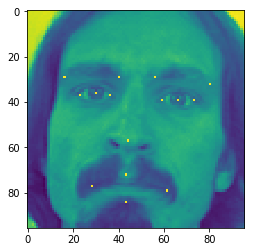

In [6]:
# Preview dataset samples
show_image(Xtrain[0], Ytrain[0])

In [7]:
# Configure Model
model = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dropout(0.1),
                         keras.layers.Dense(64, activation="relu"),
                         keras.layers.Dense(30)
                         ])

In [9]:
# Compile model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='mse',
              metrics=['mae', 'acc'])

In [10]:
# Train model
model.fit(Xtrain, Ytrain, epochs=500)

Epoch 1/500
2140/2140 [==============================] - 2s 729us/step - loss: 7993.2070 - mean_absolute_error: 55.2948 - acc: 0.1813
Epoch 2/500
2140/2140 [==============================] - 1s 478us/step - loss: 493.7185 - mean_absolute_error: 16.8441 - acc: 0.4444
Epoch 3/500
2140/2140 [==============================] - 1s 485us/step - loss: 272.4822 - mean_absolute_error: 12.4143 - acc: 0.4033
Epoch 4/500
2140/2140 [==============================] - 1s 487us/step - loss: 204.9754 - mean_absolute_error: 10.7065 - acc: 0.4467
Epoch 5/500
2140/2140 [==============================] - 1s 486us/step - loss: 196.9370 - mean_absolute_error: 10.5633 - acc: 0.4168
Epoch 6/500
2140/2140 [==============================] - 1s 530us/step - loss: 187.8983 - mean_absolute_error: 10.2823 - acc: 0.3869
Epoch 7/500
2140/2140 [==============================] - 2s 815us/step - loss: 159.2822 - mean_absolute_error: 9.4640 - acc: 0.4491 0s - loss: 160.2622 - mean_absolute_error: 9.4841 - acc: 0.44
Epoch 8

Epoch 62/500
2140/2140 [==============================] - 1s 455us/step - loss: 78.9215 - mean_absolute_error: 5.9395 - acc: 0.7033
Epoch 63/500
2140/2140 [==============================] - 1s 461us/step - loss: 92.2342 - mean_absolute_error: 6.4753 - acc: 0.7033
Epoch 64/500
2140/2140 [==============================] - 1s 453us/step - loss: 75.3502 - mean_absolute_error: 5.8580 - acc: 0.6879
Epoch 65/500
2140/2140 [==============================] - 1s 459us/step - loss: 72.5966 - mean_absolute_error: 5.7464 - acc: 0.7042
Epoch 66/500
2140/2140 [==============================] - 1s 455us/step - loss: 81.8367 - mean_absolute_error: 6.1000 - acc: 0.7042
Epoch 67/500
2140/2140 [==============================] - 1s 458us/step - loss: 95.7071 - mean_absolute_error: 6.7370 - acc: 0.7019
Epoch 68/500
2140/2140 [==============================] - 1s 458us/step - loss: 86.6343 - mean_absolute_error: 6.2176 - acc: 0.7042
Epoch 69/500
2140/2140 [==============================] - 1s 458us/step - lo

2140/2140 [==============================] - 1s 462us/step - loss: 22.1021 - mean_absolute_error: 3.5215 - acc: 0.7051
Epoch 185/500
2140/2140 [==============================] - 1s 460us/step - loss: 19.6779 - mean_absolute_error: 3.3225 - acc: 0.7051
Epoch 186/500
2140/2140 [==============================] - 1s 473us/step - loss: 21.1717 - mean_absolute_error: 3.4570 - acc: 0.7051
Epoch 187/500
2140/2140 [==============================] - 1s 465us/step - loss: 18.9849 - mean_absolute_error: 3.2734 - acc: 0.7056
Epoch 188/500
2140/2140 [==============================] - 1s 474us/step - loss: 19.5860 - mean_absolute_error: 3.2997 - acc: 0.7047
Epoch 189/500
2140/2140 [==============================] - 1s 501us/step - loss: 22.8565 - mean_absolute_error: 3.5772 - acc: 0.7056
Epoch 190/500
2140/2140 [==============================] - 1s 463us/step - loss: 19.4443 - mean_absolute_error: 3.3110 - acc: 0.7051
Epoch 191/500
2140/2140 [==============================] - 1s 456us/step - loss: 18

2140/2140 [==============================] - 1s 454us/step - loss: 10.1678 - mean_absolute_error: 2.3216 - acc: 0.7051
Epoch 307/500
2140/2140 [==============================] - 1s 458us/step - loss: 10.1724 - mean_absolute_error: 2.3223 - acc: 0.7051
Epoch 308/500
2140/2140 [==============================] - 1s 464us/step - loss: 10.1695 - mean_absolute_error: 2.3217 - acc: 0.7051
Epoch 309/500
2140/2140 [==============================] - 1s 457us/step - loss: 10.1668 - mean_absolute_error: 2.3214 - acc: 0.7051
Epoch 310/500
2140/2140 [==============================] - 1s 455us/step - loss: 10.1738 - mean_absolute_error: 2.3215 - acc: 0.7051
Epoch 311/500
2140/2140 [==============================] - 1s 456us/step - loss: 10.1692 - mean_absolute_error: 2.3213 - acc: 0.7051
Epoch 312/500
2140/2140 [==============================] - 1s 457us/step - loss: 10.1573 - mean_absolute_error: 2.3207 - acc: 0.7051
Epoch 313/500
2140/2140 [==============================] - 1s 456us/step - loss: 10

2140/2140 [==============================] - 1s 459us/step - loss: 10.1663 - mean_absolute_error: 2.3217 - acc: 0.7051
Epoch 429/500
2140/2140 [==============================] - 1s 453us/step - loss: 10.1816 - mean_absolute_error: 2.3233 - acc: 0.7051
Epoch 430/500
2140/2140 [==============================] - 1s 455us/step - loss: 10.1753 - mean_absolute_error: 2.3216 - acc: 0.7051
Epoch 431/500
2140/2140 [==============================] - 1s 451us/step - loss: 10.1787 - mean_absolute_error: 2.3234 - acc: 0.7051
Epoch 432/500
2140/2140 [==============================] - 1s 454us/step - loss: 10.1724 - mean_absolute_error: 2.3237 - acc: 0.7051
Epoch 433/500
2140/2140 [==============================] - 1s 454us/step - loss: 10.1805 - mean_absolute_error: 2.3228 - acc: 0.7051
Epoch 434/500
2140/2140 [==============================] - 1s 454us/step - loss: 10.1689 - mean_absolute_error: 2.3225 - acc: 0.7051
Epoch 435/500
2140/2140 [==============================] - 1s 475us/step - loss: 10

In [11]:
# Load test data
def load_testset():
    Xtest = []
    with open('./facialKeypoints/test/test.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            img = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype=np.float)
            for i, val in enumerate(row["Image"].split(" ")):
                img[i//IMAGE_WIDTH,i%IMAGE_WIDTH,0] = val
            Xtest.append(img)
                
    return np.array(Xtest)
Xtest = load_testset()

In [12]:
# Preview results on test data
def show_results(image_index):
    Ypred = model.predict(Xtest[image_index:(image_index+1)])
    show_image(Xtest[image_index], Ypred[0])

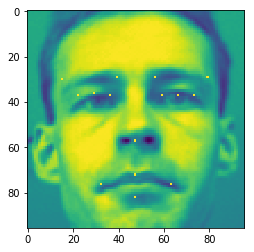

In [13]:
show_results(3)

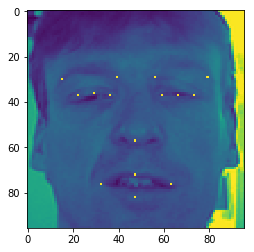

In [14]:
show_results(4)

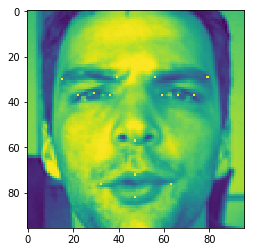

In [15]:
show_results(5)

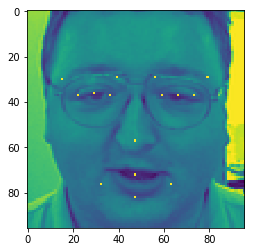

In [20]:
show_results(54)

In [21]:
model.save("sampleKernel.hd5")

In [22]:
model_loss, model_accuracy = keras_classifier.model.evaluate(X_test, y_test_categorical, verbose=2)

NameError: name 'keras_classifier' is not defined